In [1]:
from collections import defaultdict
import pandas as pd

In [2]:
f = open("fake_band_names_mit.txt")

In [3]:
bands = {}
trigrams = defaultdict(set)


for line in f:
    entry = line.strip().lower()
    bands[entry] = ""    
    length = len(entry)
    if length <= 3:
        trigrams[entry].add(entry)
    else:
        for i in range(length-2):
            trigrams[entry[i:i+3]].add(entry)

In [4]:
len(bands)

9698

In [5]:
len(trigrams)

5546

In [6]:
counts = {key: len(value) for key, value in trigrams.items()}

In [7]:
counts_df = pd.DataFrame.from_dict(counts, orient="index", columns=["count"])

In [8]:
# number of times respective trigram occurred
counts_df.head()

,count
pet,31
ett,89
tty,15
ty,147
y e,19


In [9]:
# number of times a count occurred, e.g., 969 trigrams occurred only 1 time

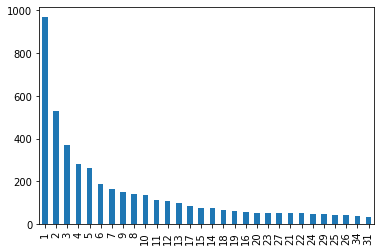

In [10]:
counts_df["count"].value_counts()[:30].plot(kind="bar")

In [11]:
counts_df["count"].value_counts().sort_index(inplace=False)[:30]

1     969
2     528
3     371
4     282
5     262
6     187
7     164
8     142
9     151
10    136
11    112
12    108
13     97
14     73
15     74
16     56
17     83
18     65
19     62
20     52
21     51
22     51
23     51
24     48
25     42
26     41
27     51
28     28
29     46
30     35
Name: count, dtype: int64

In [12]:
# 2 trigrams occurred 248 times, etc.

In [13]:
counts_df["count"].value_counts().sort_index(inplace=False)[-30:]

248    2
250    1
252    1
253    1
259    1
261    1
269    1
274    1
275    1
279    1
281    1
282    1
286    1
300    1
307    1
341    1
348    1
352    1
392    1
417    1
419    1
428    1
434    1
494    1
593    1
605    1
719    1
722    1
781    1
962    1
Name: count, dtype: int64

In [14]:
# "ble" occurred 250 times

In [15]:
for key, value in sorted(counts.items(), key=lambda item: item[1]):
    if value >= 250:
        print("'" + key + "'" + ": " + str(value))

'ble': 250
'con': 252
'and': 253
'ry ': 259
'ant': 261
'le ': 269
'res': 274
'ess': 275
'tor': 279
'est': 281
'ine': 282
'per': 286
'der': 300
'ate': 307
' co': 341
'ver': 348
'rs ': 352
'es ': 392
'on ': 417
'ent': 419
'the': 428
'her': 434
'ati': 494
'ing': 593
'tio': 605
'ter': 719
'ers': 722
'ion': 781
'er ': 962


In [16]:
counts_df.describe()

,count
count,5546.000000
mean,22.651280
std,45.005343
min,1.000000
25%,2.000000
50%,8.000000
75%,24.000000
max,962.000000
